In [1]:
import os
import zipfile
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from PIL import Image
from glob import glob
from google.colab import drive
import tensorflow as tf

import time
import cv2
from google.colab.patches import cv2_imshow

In [2]:
!cd /content/drive/MyDrive/
!zip -r fruits-classification.zip /content/drive/MyDrive/fruits-classification.zip

  adding: content/drive/MyDrive/fruits-classification.zip (stored 0%)


In [3]:
!cp /content/drive/MyDrive/fruits-classification.zip /content

In [4]:
with zipfile.ZipFile('/content/fruits-classification.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

unzipped_folder_path = '/content/Fruits Classification'
folders = os.listdir(unzipped_folder_path)

for folder in folders:
  folder_path = os.path.join(unzipped_folder_path, folder)
  print(folder_path)

/content/Fruits Classification/train
/content/Fruits Classification/data_splitting.py
/content/Fruits Classification/valid
/content/Fruits Classification/test


In [5]:
for dirname, _, filenames in os.walk('./Fruits Classification'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
./Fruits Classification/train/Mango/Mango (853).jpeg
./Fruits Classification/train/Mango/Mango (520).jpeg
./Fruits Classification/train/Mango/Mango (612).jpeg
./Fruits Classification/train/Mango/Mango (97).jpeg
./Fruits Classification/train/Mango/Mango (666).jpeg
./Fruits Classification/train/Mango/Mango (1385).jpeg
./Fruits Classification/train/Mango/Mango (87).jpeg
./Fruits Classification/train/Mango/Mango (1503).jpeg
./Fruits Classification/train/Mango/Mango (1016).jpeg
./Fruits Classification/train/Mango/Mango (851).jpeg
./Fruits Classification/train/Mango/Mango (1255).jpeg
./Fruits Classification/train/Mango/Mango (642).jpeg
./Fruits Classification/train/Mango/Mango (574).jpeg
./Fruits Classification/train/Mango/Mango (989).jpeg
./Fruits Classification/train/Mango/Mango (925).jpeg
./Fruits Classification/train/Mango/Mango (1888).jpeg
./Fruits Classification/train/Mango/Mango (869).jpeg
./Fruits Classification/train/Mango/Mango (12

In [6]:
train_path = './Fruits Classification/train/'
test_path = './Fruits Classification/test/'
val_path = './Fruits Classification/valid/'

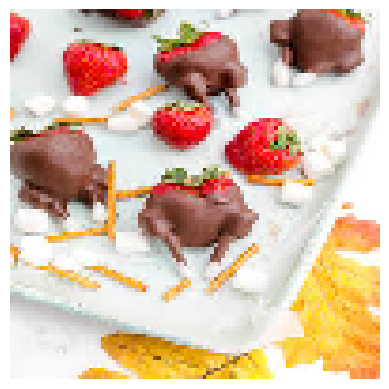

(98, 98, 3)


In [7]:
img = load_img(train_path + "Strawberry/Strawberry (923).jpeg", target_size=(98,98))
plt.imshow(img)
plt.axis("off")
plt.show()
x = img_to_array(img)
print(x.shape)

In [8]:
folder_names = glob(train_path + '/*')
classes = [name.replace(train_path, "") for name in folder_names]
print(classes)

['Grape', 'Apple', 'Mango', 'Banana', 'Strawberry']


In [9]:
img_width, img_height = 98, 98
input_shape = (img_width, img_height, 3)

In [10]:
#train_datagen = ImageDataGenerator(rescale=1./255)
#val_datagen = ImageDataGenerator(rescale=1./255)
#test_datagen = ImageDataGenerator(rescale=1./255)
datagen = ImageDataGenerator(rescale=1./255)

In [11]:
train_gen = datagen.flow_from_directory(
    train_path,
    target_size=(img_width, img_height),
    batch_size=64,
    class_mode='categorical')

Found 9700 images belonging to 5 classes.


In [12]:
val_gen = datagen.flow_from_directory(
    val_path,
    target_size=(img_width, img_height),
    batch_size=64,
    class_mode='categorical')

Found 200 images belonging to 5 classes.


In [13]:
test_gen = datagen.flow_from_directory(
    test_path,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical')

Found 100 images belonging to 5 classes.


In [14]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),

    Dense(512, activation='relu'),
    Dense(5, activation='softmax') #number of classes

])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 48, 48, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 10, 10, 128)       0

In [16]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history = model.fit(train_gen,
                    epochs=200,
                    validation_data=val_gen)


Epoch 1/200
152/152 [==============================] - 20s 68ms/step - loss: 1.2429 - accuracy: 0.4692 - val_loss: 1.0927 - val_accuracy: 0.5200
Epoch 2/200
152/152 [==============================] - 9s 57ms/step - loss: 0.9918 - accuracy: 0.5989 - val_loss: 0.9866 - val_accuracy: 0.5900
Epoch 3/200
152/152 [==============================] - 10s 63ms/step - loss: 0.8791 - accuracy: 0.6518 - val_loss: 0.9344 - val_accuracy: 0.6000
Epoch 4/200
152/152 [==============================] - 10s 64ms/step - loss: 0.7823 - accuracy: 0.6948 - val_loss: 0.8927 - val_accuracy: 0.6500
Epoch 5/200
152/152 [==============================] - 8s 56ms/step - loss: 0.6978 - accuracy: 0.7340 - val_loss: 0.7782 - val_accuracy: 0.7000
Epoch 6/200
152/152 [==============================] - 10s 65ms/step - loss: 0.6029 - accuracy: 0.7728 - val_loss: 0.7473 - val_accuracy: 0.6800
Epoch 7/200
152/152 [==============================] - 10s 64ms/step - loss: 0.4720 - accuracy: 0.8256 - val_loss: 0.8283 - val_accu

In [18]:
loss, accuracy = model.evaluate(test_gen)

4/4 [==============================] - 0s 49ms/step - loss: 3.1603 - accuracy: 0.7500


In [19]:
print("Accuracy:", accuracy)

Accuracy: 0.75


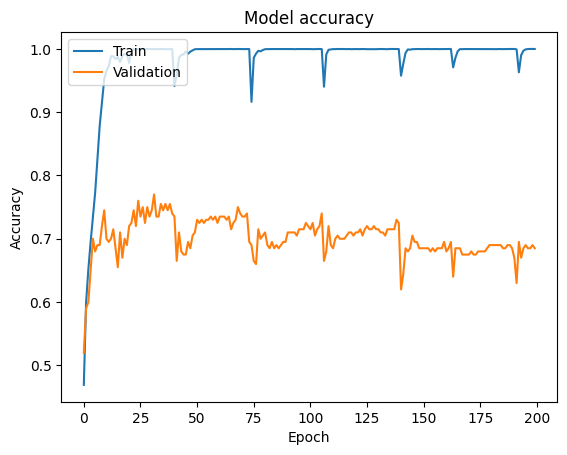

In [20]:
# Plot training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()